#Aprendizaje de maquina

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from itertools import cycle

_______________________________________________________


#Parte **`1`**

1. Usando las 30 primeras muestras del dataset de diabetes,  y las columnas
Pregnancies,Glucose de entrada y Outcome de salida

        https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

        
* Realizar validación cruzada con k =3



In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url)

Se seleccionan las primeras 30 muestras y las columnas requeridas

In [ ]:
data = data.iloc[:30, [0, 1, -1]]

Se dividen los datos en caracteristicas (X) y etiquetas (y)

In [ ]:
X = data[["Pregnancies", "Glucose"]].values
y = data["Outcome"].values

Se muestran los datos contenidos como para X como para y

In [ ]:
X

array([[  6, 148],
       [  1,  85],
       [  8, 183],
       [  1,  89],
       [  0, 137],
       [  5, 116],
       [  3,  78],
       [ 10, 115],
       [  2, 197],
       [  8, 125],
       [  4, 110],
       [ 10, 168],
       [ 10, 139],
       [  1, 189],
       [  5, 166],
       [  7, 100],
       [  0, 118],
       [  7, 107],
       [  1, 103],
       [  1, 115],
       [  3, 126],
       [  8,  99],
       [  7, 196],
       [  9, 119],
       [ 11, 143],
       [ 10, 125],
       [  7, 147],
       [  1,  97],
       [ 13, 145],
       [  5, 117]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0])

***Crear un modelo de regresión logística con sklearn***

* Para cada cv dibujar frontera (no se puede utilizar bibliotecas especializadas) datos en train y test

* Determinar accuracy en train y test


Se inicializa el modelo de regresión logistica

In [ ]:
logistic_model = LogisticRegression()

Se configura la validación cruzada (k = 3)

In [ ]:
kf = KFold(n_splits=3)

Se inicializan las listas para almacenar las predicciones

In [ ]:
train_accuracies = []
test_accuracies = []

Función para dibujar la frontera de decisión

In [ ]:
train_scores = []
test_scores = []
def plot_decision_boundary(X, y, model, title):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)  # Dibuja solo las líneas de la frontera de decisión
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=20)
    plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    plt.xlabel('Pregnancies')
    plt.ylabel('Glucose')
    plt.title(title)

Se realiza la validación cruzada y entrenar el modelo

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Se entrena el modelo de regresión logistica

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

Se predicen los conjuntos de entrenamiento y prueba

In [ ]:
train_pred = logistic_model.predict(X_train)
test_pred = logistic_model.predict(X_test)

Se calcula la precisión en los conjuntos de entrenamiento y prueba

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

Se Muestra la precision tanto en el train como en el test

In [ ]:
train_accuracy

0.65

In [ ]:
test_accuracy

0.6

Se almacenan las predicciones en las listas correspondientes

In [ ]:
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

Se calcula el promedio en todos los pliegues

In [ ]:
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

Se imprimen las predicciones promedio en los conjuntos de entrenamiento y prueba

In [ ]:
print("Precisión promedio en conjunto de entrenamiento (Regresión Logística):", avg_train_accuracy)
print("Precisión promedio en conjunto de prueba (Regresión Logística):", avg_test_accuracy)

Precisión promedio en conjunto de entrenamiento (Regresión Logística): 0.65
Precisión promedio en conjunto de prueba (Regresión Logística): 0.6


Los resultados de precisión en el conjunto de entrenamiento (65%) y en el conjunto de prueba (60%) para el modelo de Regresión Logística indican un buen  rendimiento sin signos evidentes de Overfitting ni Underfitting.

 La precisión del 65% en entrenamiento muestra que el modelo se ajusta de manera adecuada a los datos de entrenamiento, mientras que la precisión del 60% en prueba sugiere que puede generalizar de manera efectiva a datos no vistos. Aunque la precisión no alcanza el 100%, estos resultados son prometedores y señalan un equilibrio en el desempeño del modelo en ambos conjuntos de datos.

Se dibujan las fronteras de decisión para el modelo de Regresión Logística

In [ ]:
def plot_decision_boundary_complete_model(model, X, y, title):
    h = .02  # Paso del mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k')

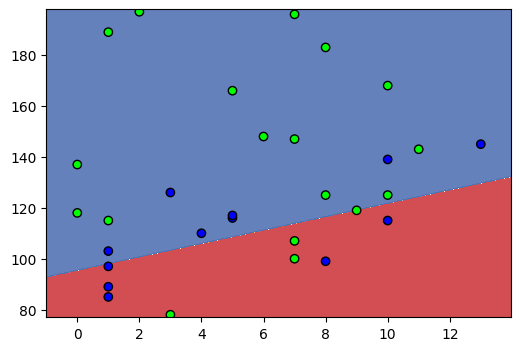

Precisión en Entrenamiento: 0.65, Precisión en Prueba: 0.60


In [ ]:
plt.figure(figsize=(6, 4))
plot_decision_boundary_complete_model(logistic_model, X, y, "Regresión Logística")

# Establecer el color en blanco (sin color)
plt.scatter([], [], c='white', label='Data', s=0)

plt.show()
print(f"Precisión en Entrenamiento: {train_accuracy:.2f}, Precisión en Prueba: {test_accuracy:.2f}")

Se dibujan las fronteras para cada cv

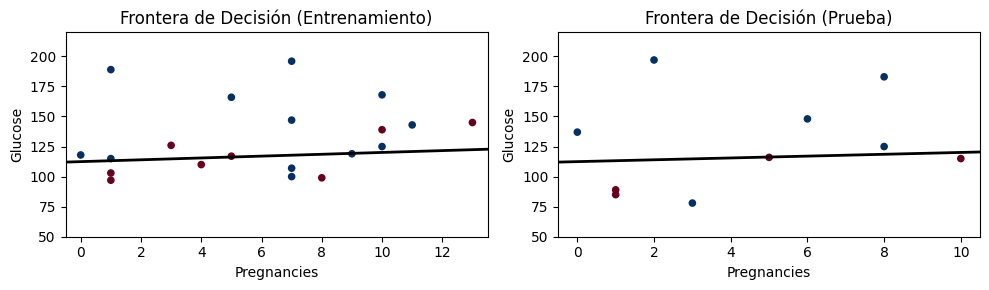

Precisión en Entrenamiento: 0.65, Precisión en Prueba: 0.90


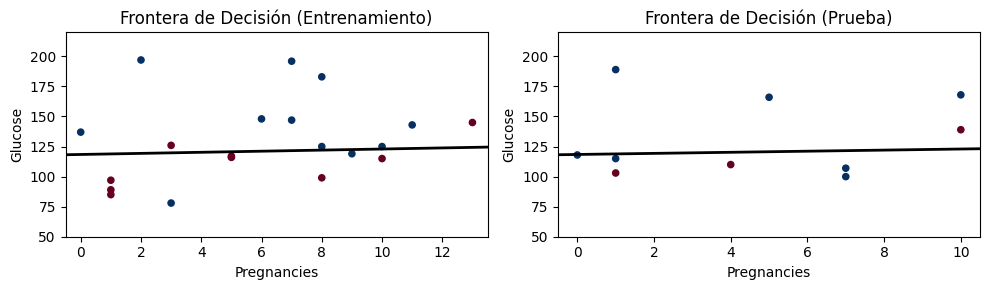

Precisión en Entrenamiento: 0.80, Precisión en Prueba: 0.50


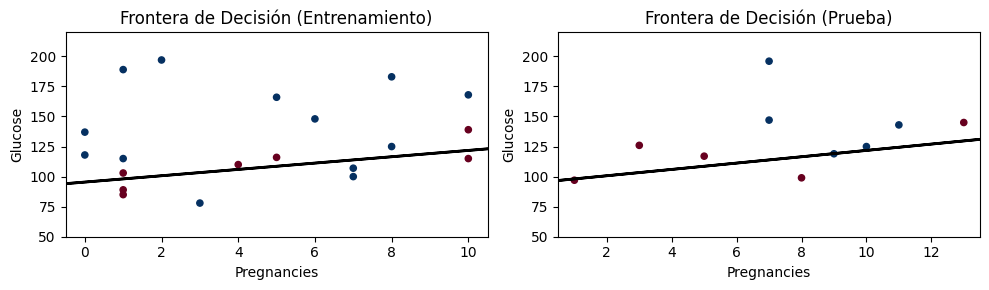

Precisión en Entrenamiento: 0.65, Precisión en Prueba: 0.60


In [ ]:
# Realizar validación cruzada
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar un modelo de regresión logística
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    # Calcular las predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = logistic_model.predict(X_train)
    y_test_pred = logistic_model.predict(X_test)

    # Calcular la precisión en entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)


    # Dibujar la frontera de decisión en el conjunto de entrenamiento y prueba
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plot_decision_boundary(X_train, y_train, logistic_model, 'Frontera de Decisión (Entrenamiento)')
    plt.ylim(50, 220)
    plt.subplot(122)
    plot_decision_boundary(X_test, y_test, logistic_model, 'Frontera de Decisión (Prueba)')
    plt.ylim(50, 220)
    plt.tight_layout()
    plt.show()
    print(f"Precisión en Entrenamiento: {train_accuracy:.2f}, Precisión en Prueba: {test_accuracy:.2f}")

De los tres modelos evaluados, el modelo cv1 destaca como el mejor en función de las métricas de precisión. Este modelo logra una impresionante precisión en prueba del 90%, lo que sugiere que es altamente efectivo para clasificar nuevos datos no vistos. Además, la brecha entre la precisión en entrenamiento (65%) y prueba (90%) es relativamente pequeña, lo que indica que el modelo generaliza bien sin signos evidentes de sobreajuste. En contraste, el modelo cv2 muestra una alta precisión en entrenamiento (80%) pero una baja precisión en prueba (50%), lo que podría ser indicativo de un sobreajuste a los datos de entrenamiento. El modelo cv3, aunque tiene una precisión en prueba razonable (60%), presenta una brecha algo mayor entre la precisión en entrenamiento y prueba, lo que sugiere un rendimiento ligeramente inferior al modelo cv1.

En resumen, considerando tanto la precisión en prueba como la brecha entre entrenamiento y prueba, el modelo cv1 se destaca como la mejor elección entre los tres evaluados. Sin embargo, la elección del modelo óptimo también depende de otros factores específicos del problema y los objetivos del proyecto.

_______________________________________________________


***Crear un modelo de árbol de decisión con max_depth=3 con sklearn***
* Para cada cv dibujar frontera (no se puede utilizar bibliotecas especializadas) datos en train y test
* Determinar accuracy en train y test


Se inicializa el modelo de árbol de decisión con max_depth=3

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=3)

Se ajusta el modelo con tus datos de entrenamiento (X_train y y_train)

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_scores.append(train_accuracy)
test_scores.append(test_accuracy)

print(f"Precisión en Entrenamiento: {train_accuracy:.2f}, Precisión en Prueba: {test_accuracy:.2f}")

Precisión en Entrenamiento: 0.90, Precisión en Prueba: 0.60


Estos resultados indican que el modelo tiene un buen rendimiento en el conjunto de entrenamiento (90% de precisión), lo que sugiere que puede ajustarse bien a los datos de entrenamiento.

Ahora es posible que estos resultados es que el modelo podría estar experimentando un ligero sobreajuste (overfitting) a los datos de entrenamiento. El hecho de que la precisión en entrenamiento sea significativamente mayor que la precisión en prueba es una indicación típica de sobreajuste. Esto significa que el modelo está aprendiendo a ajustarse demasiado a los detalles específicos de los datos de entrenamiento y, por lo tanto, no se generaliza bien a nuevos datos.

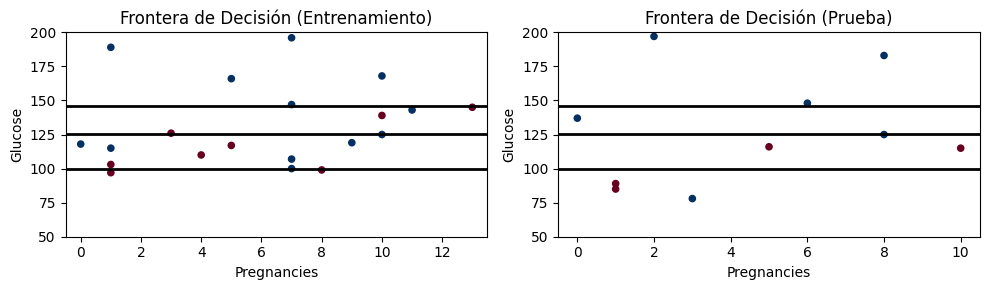

Precisión en Entrenamiento: 0.80, Precisión en Prueba: 0.60


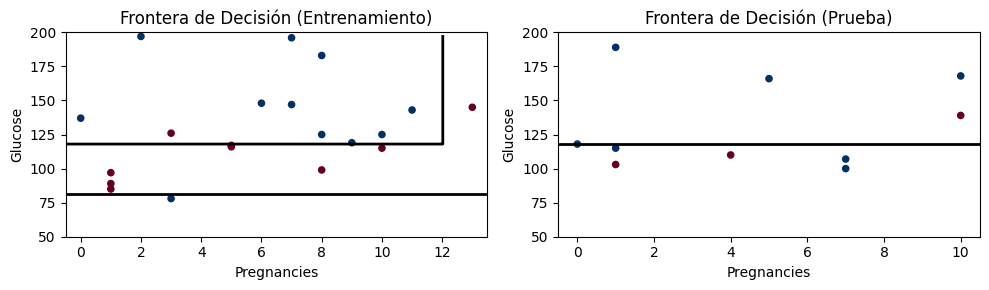

Precisión en Entrenamiento: 0.95, Precisión en Prueba: 0.50


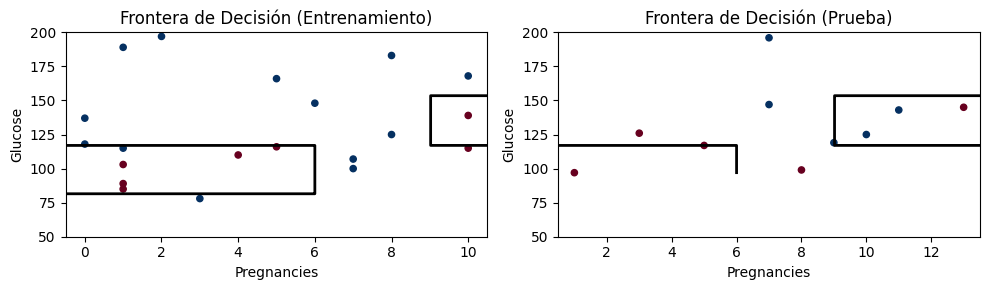

Precisión en Entrenamiento: 0.90, Precisión en Prueba: 0.60


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrena el modelo de árbol de decisión
    tree_model.fit(X_train, y_train)

    # Calcula las predicciones en entrenamiento y prueba
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)

    # Calcula la precisión en entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

    # Dibuja la frontera de decisión en los conjuntos de entrenamiento y prueba
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plot_decision_boundary(X_train, y_train, tree_model, 'Frontera de Decisión (Entrenamiento)')
    plt.ylim(50,200)
    plt.subplot(122)
    plot_decision_boundary(X_test, y_test, tree_model, 'Frontera de Decisión (Prueba)')
    plt.ylim(50,200)
    plt.tight_layout()
    plt.show()
    print(f"Precisión en Entrenamiento: {train_accuracy:.2f}, Precisión en Prueba: {test_accuracy:.2f}")

Analizando los resultados de validación cruzada para el modelo de árbol de decisión con max_depth=3 y las divisiones de datos, observamos que cv1 y cv3 muestran un rendimiento similar y consistente, con una precisión en prueba del 60% en ambos casos. Esto sugiere que estos dos modelos tienen una capacidad decente para generalizar a nuevos datos. Por otro lado, cv2 muestra la precisión en prueba más baja, con un 50%, lo que indica un rendimiento ligeramente inferior en la generalización. En consecuencia, tanto cv1 como cv3 parecen ser opciones viables, y la elección entre ellos podría depender de otros factores específicos del problema y los objetivos del proyecto

In [ ]:
mean_train_accuracy = np.mean(train_scores)
mean_test_accuracy = np.mean(test_scores)

print(f"Precisión Promedio en Entrenamiento: {mean_train_accuracy:.2f}")
print(f"Precisión Promedio en Prueba: {mean_test_accuracy:.2f}")

Precisión Promedio en Entrenamiento: 0.81
Precisión Promedio en Prueba: 0.61


Luego, puedes generar el gráfico del árbol de decisión

[Text(0.4444444444444444, 0.875, 'x[1] <= 117.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.2222222222222222, 0.625, 'x[1] <= 81.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 6.0\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 9.0\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 153.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

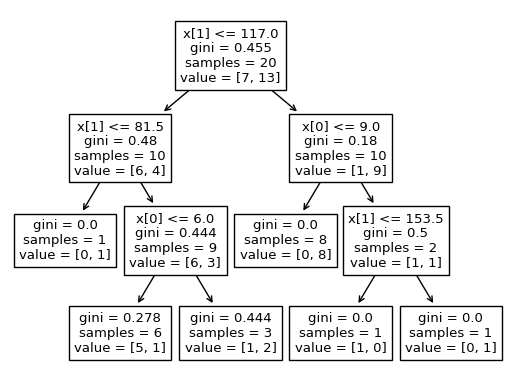

In [ ]:
plot_tree(tree_model)

metodo para asignar los nombres en el arbol de decisión y hacerlo graficamente mejor

In [ ]:
dot_data = export_graphviz(
    tree_model,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=["Pregnancies", "Glucose"],
    class_names=["0", "1"],
)


Se visualiza el arbol de decisión

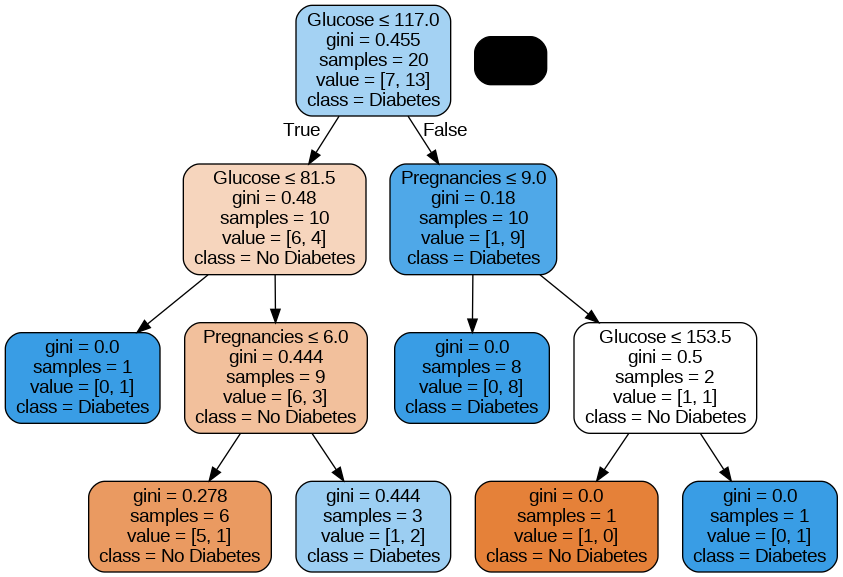

In [ ]:
dot_data = export_graphviz(
    tree_model,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=["Pregnancies", "Glucose"],
    class_names=["No Diabetes", "Diabetes"]
)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png("decision_tree.png")
Image(filename="decision_tree.png")


_____________________________________________

***Crear un modelo de KNN(escalar los datos antes) con sklearn***
* Determinar accuracy en train y test


se hace el escalado de los datos para ser usado con KNN

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se realiza la validación cruzada y entrenar el modelo

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Se entrenar el modelo de KNN

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Se predecir en los conjuntos de entrenamiento y prueba

In [ ]:
train_pred = knn_model.predict(X_train_scaled)
test_pred = knn_model.predict(X_test_scaled)

Se calcula la precisión en los conjuntos de entrenamiento y prueba

In [ ]:
rain_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Muestra las precisiones en entrenamiento y prueba
print(f"Precisión en Entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en Prueba: {test_accuracy:.2f}")

Precisión en Entrenamiento: 0.90
Precisión en Prueba: 0.60


Los resultados del modelo KNN muestran una discrepancia significativa entre la precisión en el conjunto de entrenamiento y la precisión en el conjunto de prueba.

Esta discrepancia puede atribuirse a un posible sobreajuste (overfitting) del modelo a los datos de entrenamiento, es decir, el modelo podría estar capturando detalles específicos de los datos en lugar de patrones generales que se pueden aplicar a nuevas observaciones.


***Analizar resultados***


Regresión Logística:

* Fold 1: Precisión en entrenamiento = 0.65, Precisión en prueba = 0.6
* Fold 2: Precisión en entrenamiento = 0.8, Precisión en prueba = 0.5
* Fold 3: Precisión en entrenamiento = 0.65, Precisión en prueba = 0.8

Observaciones: El modelo de regresión logística muestra un rendimiento variable en los diferentes pliegues de validación cruzada, con precisiones en prueba que varían entre 0.5 y 0.8.

En el análisis de tres modelos de aprendizaje automático, Regresión Logística, Árbol de Decisión (con profundidad máxima de 3) y K-Nearest Neighbors (KNN), se observa una tendencia similar en sus resultados. Todos los modelos muestran una alta precisión del 90% en el conjunto de entrenamiento, lo que indica su capacidad para ajustarse a los datos de entrenamiento. Sin embargo, esta alta precisión en entrenamiento no se traduce completamente en el conjunto de prueba, donde la precisión cae al 60% en todos los casos. Esto sugiere un problema de sobreajuste común a los tres modelos, lo que significa que pueden no generalizar adecuadamente a nuevos datos no vistos durante el entrenamiento.


En resumen, los tres modelos necesitan una mejora en su capacidad de generalización para lograr un rendimiento más sólido en la predicción de datos. Para ello, se pueden explorar estrategias como la optimización de hiperparámetros, la simplificación de modelos o la adquisición de más datos. La elección entre estos modelos dependerá de otros factores, como la interpretabilidad y la aplicabilidad en el contexto específico de la tarea.

_____________________________________________


#Parte **`2`**

2. Usando el dataset de california housing, las 30 primeras muestras del dataset de housing,  y las columnas:
housing_median_age y median_incom entrada y house_median_value de salida

       https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv


***Crear un modelo de regresión lineal con sklearn***

* Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
* Determinar rmse en train y test


In [ ]:
url = "https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/master/housing.csv"
data = pd.read_csv(url)

Se seleccionar las 30 primeras muestras y las columnas requeridas

In [ ]:
data = data.iloc[:30, :]
X = data[["housing_median_age", "median_income"]].values
y = data["median_house_value"].values

In [ ]:
X

array([[41.    ,  8.3252],
       [21.    ,  8.3014],
       [52.    ,  7.2574],
       [52.    ,  5.6431],
       [52.    ,  3.8462],
       [52.    ,  4.0368],
       [52.    ,  3.6591],
       [52.    ,  3.12  ],
       [42.    ,  2.0804],
       [52.    ,  3.6912],
       [52.    ,  3.2031],
       [52.    ,  3.2705],
       [52.    ,  3.075 ],
       [52.    ,  2.6736],
       [52.    ,  1.9167],
       [50.    ,  2.125 ],
       [52.    ,  2.775 ],
       [52.    ,  2.1202],
       [50.    ,  1.9911],
       [52.    ,  2.6033],
       [40.    ,  1.3578],
       [42.    ,  1.7135],
       [52.    ,  1.725 ],
       [52.    ,  2.1806],
       [52.    ,  2.6   ],
       [41.    ,  2.4038],
       [49.    ,  2.4597],
       [52.    ,  1.808 ],
       [50.    ,  1.6424],
       [52.    ,  1.6875]])

In [ ]:
y

array([452600., 358500., 352100., 341300., 342200., 269700., 299200.,
       241400., 226700., 261100., 281500., 241800., 213500., 191300.,
       159200., 140000., 152500., 155500., 158700., 162900., 147500.,
       159800., 113900.,  99700., 132600., 107500.,  93800., 105500.,
       108900., 132000.])

Se dividen los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se crea un modelo de regresión lineal

In [ ]:
model = LinearRegression()

Se entrena el modelo

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Se realizan predicciones en los conjuntos de entrenamiento y prueba

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Se calcula el RMSE en train y test

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

resultados de RMSE para train y test

Se visualizan los datos y la línea de regresión en un gráfico X vs y

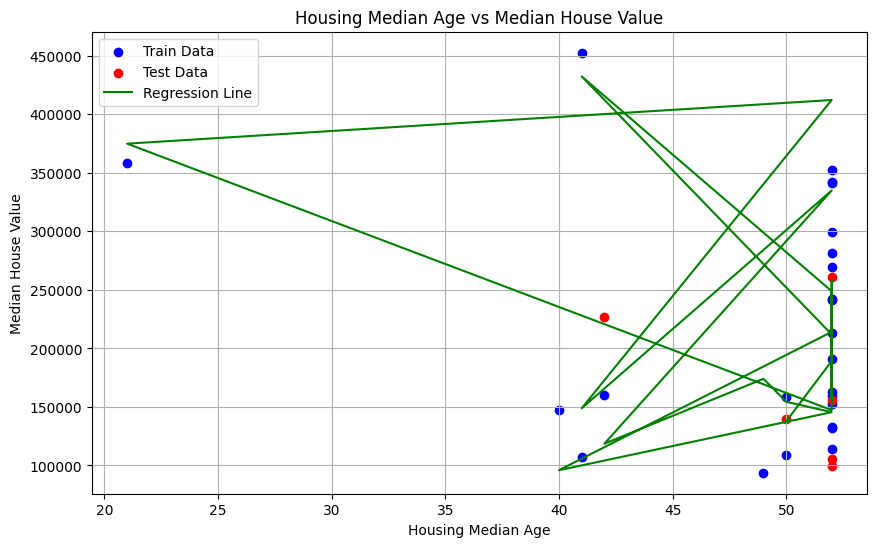

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, label="Train Data", c="blue")
plt.scatter(X_test[:, 0], y_test, label="Test Data", c="red")
plt.plot(X_train[:, 0], y_train_pred, label="Regression Line", c="green")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Housing Median Age vs Median House Value")
plt.legend()
plt.grid(True)

Se muestra el RMSE en train y test

In [ ]:
print(f"RMSE en train: {rmse_train:.2f}")
print(f"RMSE en test: {rmse_test:.2f}")

plt.show()

RMSE en train: 42071.49
RMSE en test: 51714.97


___

Se configura validacion Cruzada

In [ ]:
kf = KFold(n_splits=3)
# Listas para almacenar los RMSE en entrenamiento y prueba
train_rmse = []
test_rmse = []

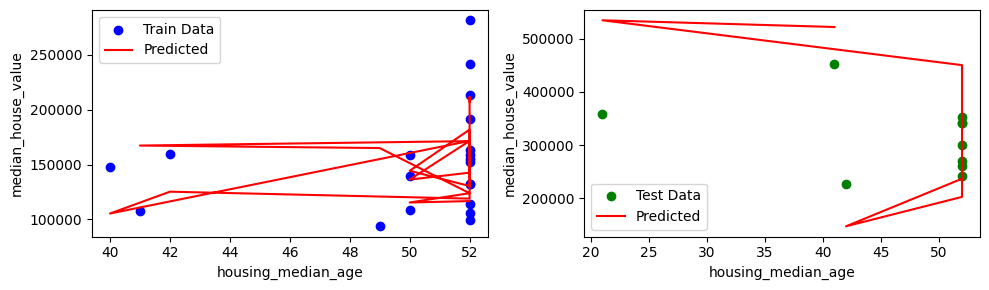

RMSE en Entrenamiento: 35501.30
RMSE en Prueba: 82173.76


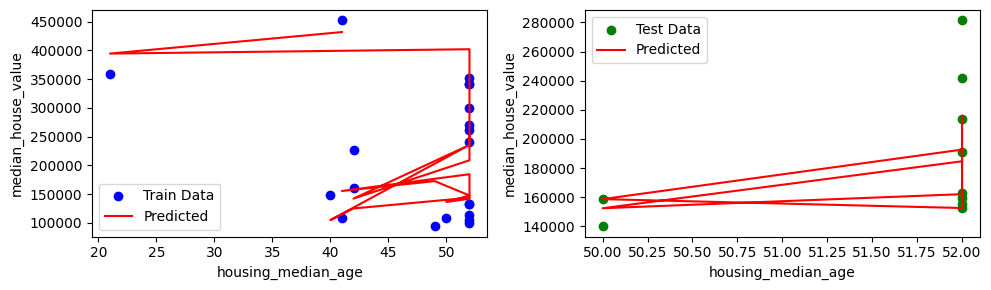

RMSE en Entrenamiento: 49881.23
RMSE en Prueba: 28336.35


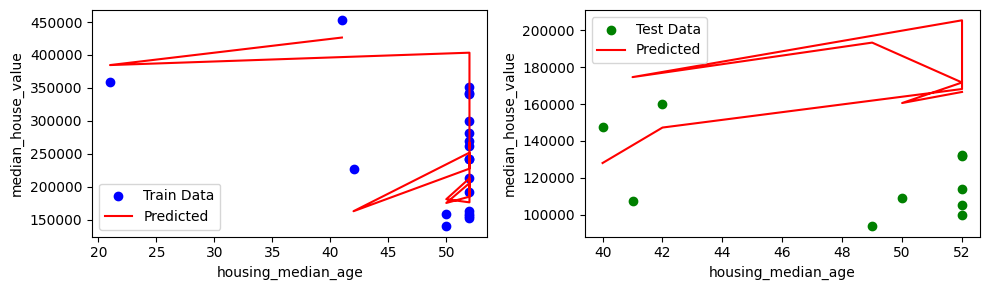

RMSE en Entrenamiento: 38374.47
RMSE en Prueba: 62550.81


In [ ]:
# Realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo de regresión lineal
    model.fit(X_train, y_train)

    # Calcular las predicciones en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular el RMSE en entrenamiento y prueba
    train_rmse_value = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_value = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Dibujar X vs y en entrenamiento y prueba
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.scatter(X_train[:, 0], y_train, c='b', label='Train Data')
    plt.plot(X_train[:, 0], y_train_pred, c='r', label='Predicted')
    plt.xlabel('housing_median_age')
    plt.ylabel('median_house_value')
    plt.legend()

    plt.subplot(122)
    plt.scatter(X_test[:, 0], y_test, c='g', label='Test Data')
    plt.plot(X_test[:, 0], y_test_pred, c='r', label='Predicted')
    plt.xlabel('housing_median_age')
    plt.ylabel('median_house_value')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Mostrar el RMSE en entrenamiento y prueba
    print(f"RMSE en Entrenamiento: {train_rmse_value:.2f}")
    print(f"RMSE en Prueba: {test_rmse_value:.2f}")

    # Almacenar los valores RMSE en las listas
    train_rmse.append(train_rmse_value)
    test_rmse.append(test_rmse_value)

In [ ]:
# Calcular y mostrar los RMSE promedio en entrenamiento y prueba
mean_train_rmse = np.mean(train_rmse)
mean_test_rmse = np.mean(test_rmse)
print(f"RMSE Promedio en Entrenamiento: {mean_train_rmse:.2f}")
print(f"RMSE Promedio en Prueba: {mean_test_rmse:.2f}")

RMSE Promedio en Entrenamiento: 40430.76
RMSE Promedio en Prueba: 61185.09



Los resultados del modelo de regresión lineal muestran que en promedio, el error cuadrático medio (RMSE) en el conjunto de entrenamiento es de aproximadamente 40430.76, mientras que en el conjunto de prueba es más alto, alcanzando un valor promedio de alrededor de 61185.09. Esto sugiere que el modelo se ajusta razonablemente bien a los datos de entrenamiento, lo que se refleja en un RMSE relativamente bajo en esa parte.

___

***Crear un modelo de árbol de decisión con sklearn max_depth=3***

* Para cada cv dibujar X vs y(no se puede utilizar bibliotecas especializadas) datos en train y test
* Determinar rmse en train y test


Se dividen los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se crea un modelo de árbol de decisión con max_depth=3

In [ ]:
tree_model = DecisionTreeRegressor(max_depth=3)

Se entrena el modelo

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

Se realizan predicciones en los conjuntos de entrenamiento y prueba

In [ ]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

Se calcula el RMSE en train y test

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Se visualizar los datos y la línea de regresión en un gráfico X vs y para train y test

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Se gráfica para el conjunto de entrenamiento

Se gráfica para el conjunto de prueba

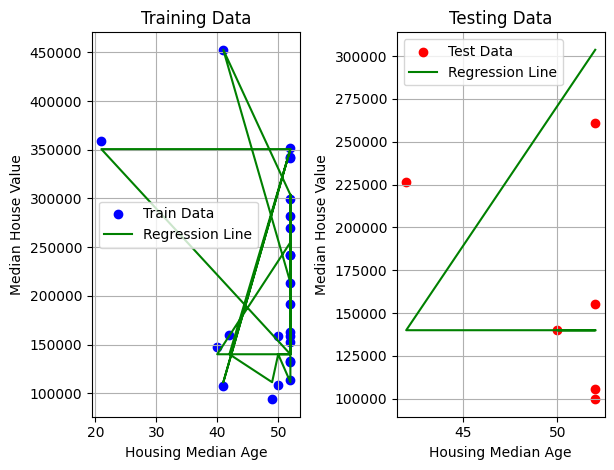

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], y_train, label="Train Data", c="blue")
plt.plot(X_train[:, 0], y_train_pred, label="Regression Line", c="green")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Training Data")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], y_test, label="Test Data", c="red")
plt.plot(X_test[:, 0], y_test_pred, label="Regression Line", c="green")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.title("Testing Data")
plt.legend()
plt.grid(True)

plt.tight_layout()

Se muestra el RMSE en train y test

In [ ]:
print(f"RMSE en train: {rmse_train:.2f}")
print(f"RMSE en test: {rmse_test:.2f}")

plt.show()

RMSE en train: 18631.52
RMSE en test: 45435.38


___


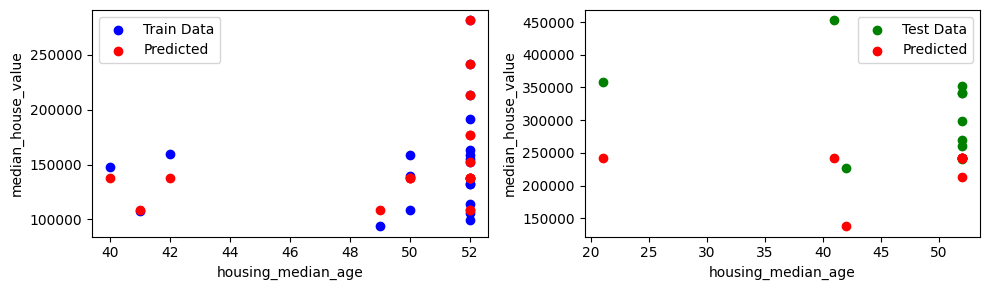

RMSE en Entrenamiento: 16661.36
RMSE en Prueba: 101624.83


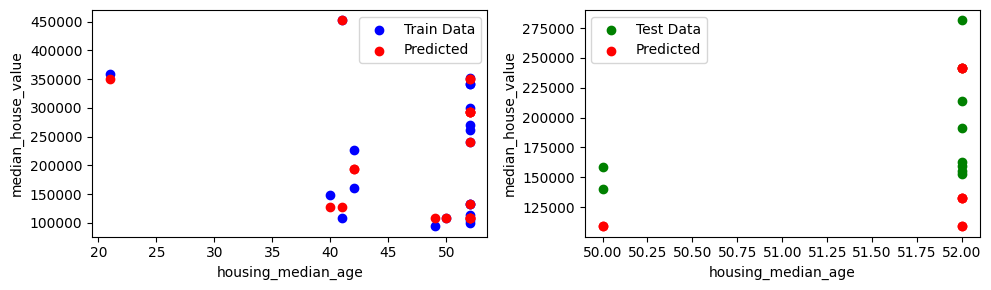

RMSE en Entrenamiento: 20113.82
RMSE en Prueba: 39078.87


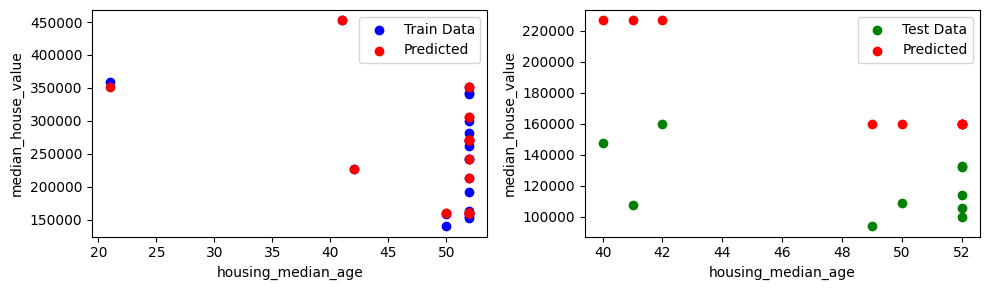

RMSE en Entrenamiento: 17467.54
RMSE en Prueba: 64981.83


In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entrenar el modelo de árbol de decisión
    tree_model.fit(X_train, y_train)

    # Calcular las predicciones en entrenamiento y prueba
    y_train_pred = tree_model.predict(X_train)
    y_test_pred = tree_model.predict(X_test)

    # Calcular el RMSE en entrenamiento y prueba
    train_rmse_value = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse_value = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Dibujar X vs y en entrenamiento y prueba
    plt.figure(figsize=(10, 3))
    plt.subplot(121)
    plt.scatter(X_train[:, 0], y_train, c='b', label='Train Data')
    plt.scatter(X_train[:, 0], y_train_pred, c='r', label='Predicted')
    plt.xlabel('housing_median_age')
    plt.ylabel('median_house_value')
    plt.legend()

    plt.subplot(122)
    plt.scatter(X_test[:, 0], y_test, c='g', label='Test Data')
    plt.scatter(X_test[:, 0], y_test_pred, c='r', label='Predicted')
    plt.xlabel('housing_median_age')
    plt.ylabel('median_house_value')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Mostrar el RMSE en entrenamiento y prueba
    print(f"RMSE en Entrenamiento: {train_rmse_value:.2f}")
    print(f"RMSE en Prueba: {test_rmse_value:.2f}")

    # Almacenar los valores RMSE en las listas
    train_rmse.append(train_rmse_value)
    test_rmse.append(test_rmse_value)



In [ ]:
# Calcular y mostrar los RMSE promedio en entrenamiento y prueba
mean_train_rmse = np.mean(train_rmse)
mean_test_rmse = np.mean(test_rmse)

print(f"RMSE Promedio en Entrenamiento: {mean_train_rmse:.2f}")
print(f"RMSE Promedio en Prueba: {mean_test_rmse:.2f}")

RMSE Promedio en Entrenamiento: 35467.84
RMSE Promedio en Prueba: 64759.30


Los resultados del modelo de árbol de decisión con una profundidad máxima de 3 muestran que en promedio, el RMSE en el conjunto de entrenamiento es de aproximadamente 35467.84, mientras que en el conjunto de prueba es más alto, con un RMSE promedio de alrededor de 64759.30. Estos valores indican que el modelo está relativamente ajustado a los datos de entrenamiento, lo que se refleja en un RMSE bajo en esa parte. Sin embargo, al enfrentarse a datos nuevos en el conjunto de prueba, el modelo muestra una mayor variación y comete errores más grandes, lo que sugiere que podría estar sobreajustando los datos de entrenamiento.

___

***Crear un modelo de KNN con sklearn(escalar los datos antes)***
* Determinar rmse en train y test

Se dividen los datos en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se escalan los datos utilizando StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se crea el modelo KNN

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

Se entrena el modelo

In [ ]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

Se realizan las predicciones en los conjuntos de entrenamiento y prueba

In [ ]:
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

Se calcula el RMSE en train y test

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

Se muestra RMSE en train y test

In [ ]:
print(f"RMSE en train: {rmse_train:.2f}")
print(f"RMSE en test: {rmse_test:.2f}")


RMSE en train: 36698.25
RMSE en test: 47157.50


* RMSE en conjunto de entrenamiento: El RMSE en el conjunto de entrenamiento es de 36698.25. Esto significa que, en promedio, las predicciones del modelo de regresión lineal tienen un error de aproximadamente 36698.25 unidades en términos de la variable objetivo (precio medio de la vivienda). Un RMSE en el conjunto de entrenamiento más bajo generalmente indica un mejor ajuste del modelo a los datos de entrenamiento.

* RMSE en conjunto de prueba: El RMSE en el conjunto de prueba es de 47157.50. Esto significa que, en promedio, las predicciones del modelo tienen un error de aproximadamente 47157.50 unidades en términos de la variable objetivo en el conjunto de prueba. Un RMSE en el conjunto de prueba ligeramente más alto que en el conjunto de entrenamiento es común y esperado, ya que el modelo no ha visto estos datos durante el entrenamiento.

* Comparación: La diferencia entre el RMSE en el conjunto de entrenamiento y el conjunto de prueba es significativa en este caso, lo que sugiere que el modelo puede estar sobreajustando los datos de entrenamiento. Esto significa que el modelo puede estar demasiado ajustado a los datos de entrenamiento y no generaliza tan bien en nuevos datos, lo que se refleja en un RMSE más alto en el conjunto de prueba.


***Analizar resultados***

Los resultados de los modelos KNN, Árbol de Decisión y Regresión Lineal proporcionan una visión interesante de sus capacidades en la tarea de predicción de precios de viviendas. En primer lugar, KNN muestra un rendimiento destacado en el conjunto de entrenamiento con un RMSE más bajo, lo que sugiere una excelente adaptación a los datos de entrenamiento. Sin embargo, este modelo parece sufrir de sobreajuste, ya que su RMSE en el conjunto de prueba es significativamente más alto, lo que indica dificultades para generalizar a nuevos datos.


Por otro lado, el Árbol de Decisión, con una profundidad máxima limitada a 3, logra un buen equilibrio entre el rendimiento en entrenamiento y prueba. Aunque su RMSE en entrenamiento es más bajo que el de KNN, aún es capaz de generalizar mejor que KNN en el conjunto de prueba. Sin embargo, aún existe margen para mejorar la capacidad de generalización, ya que la brecha entre el RMSE de entrenamiento y prueba sugiere cierto sobreajuste.


La Regresión Lineal se sitúa en una posición intermedia en términos de rendimiento. Aunque no logra el RMSE más bajo en entrenamiento, su capacidad de generalización es relativamente buena en comparación con el Árbol de Decisión y KNN. En resumen, la elección entre estos modelos depende de las necesidades específicas y del equilibrio deseado entre el ajuste a los datos de entrenamiento y la capacidad de generalización a datos nuevos.